# Jupyter Notebook Project

## 1 - Summary of Selected Project Topic
<br>

The project topic that I have chosen revolve around COVID-19 and GIS application. This topic has affected me in a numerous ways and was inspired by [this post](https://towardsdatascience.com/visualizing-the-coronavirus-pandemic-with-choropleth-maps-7f30fccaecf5). 

The author illustrated and provided examples of how to display COVID-19 using choropleth maps for the entire world using python plotly, numpy, pandas, and other modules. 

This final project is aimed to analyze COVID-19 data for the United States only and provide visualizations. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlretrieve
from matplotlib.ticker import MultipleLocator
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


# load dataset and find latest COVID-19 results
df = pd.read_json("https://covidtracking.com/api/v1/states/daily.json")
df = df.sort_values(by=["date"], ascending=False)
lastDate = df["date"][0]
df_latest = df.loc[df["date"] == lastDate]

df = df.rename(columns={"dateChecked": "date",
                        "totalTestResults": "Total Cases"})

fig = go.Figure(data=go.Choropleth(
    locations=df_latest['state'],
    locationmode='USA-states',
    z=df_latest['positive'],
    colorscale='darkmint',
    marker_line_color='black',
    marker_line_width=0.5,
    ))
fig.update_geos(
    visible=False, resolution=110, scope="usa",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)
fig.update_layout(
    title_text='Total Confirmed Cases in USA as of {}'.format(lastDate),
    title_x=0.5,
    geo=dict(projection_type='albers usa'),
    height=500,
    width=700
)

fig.show()

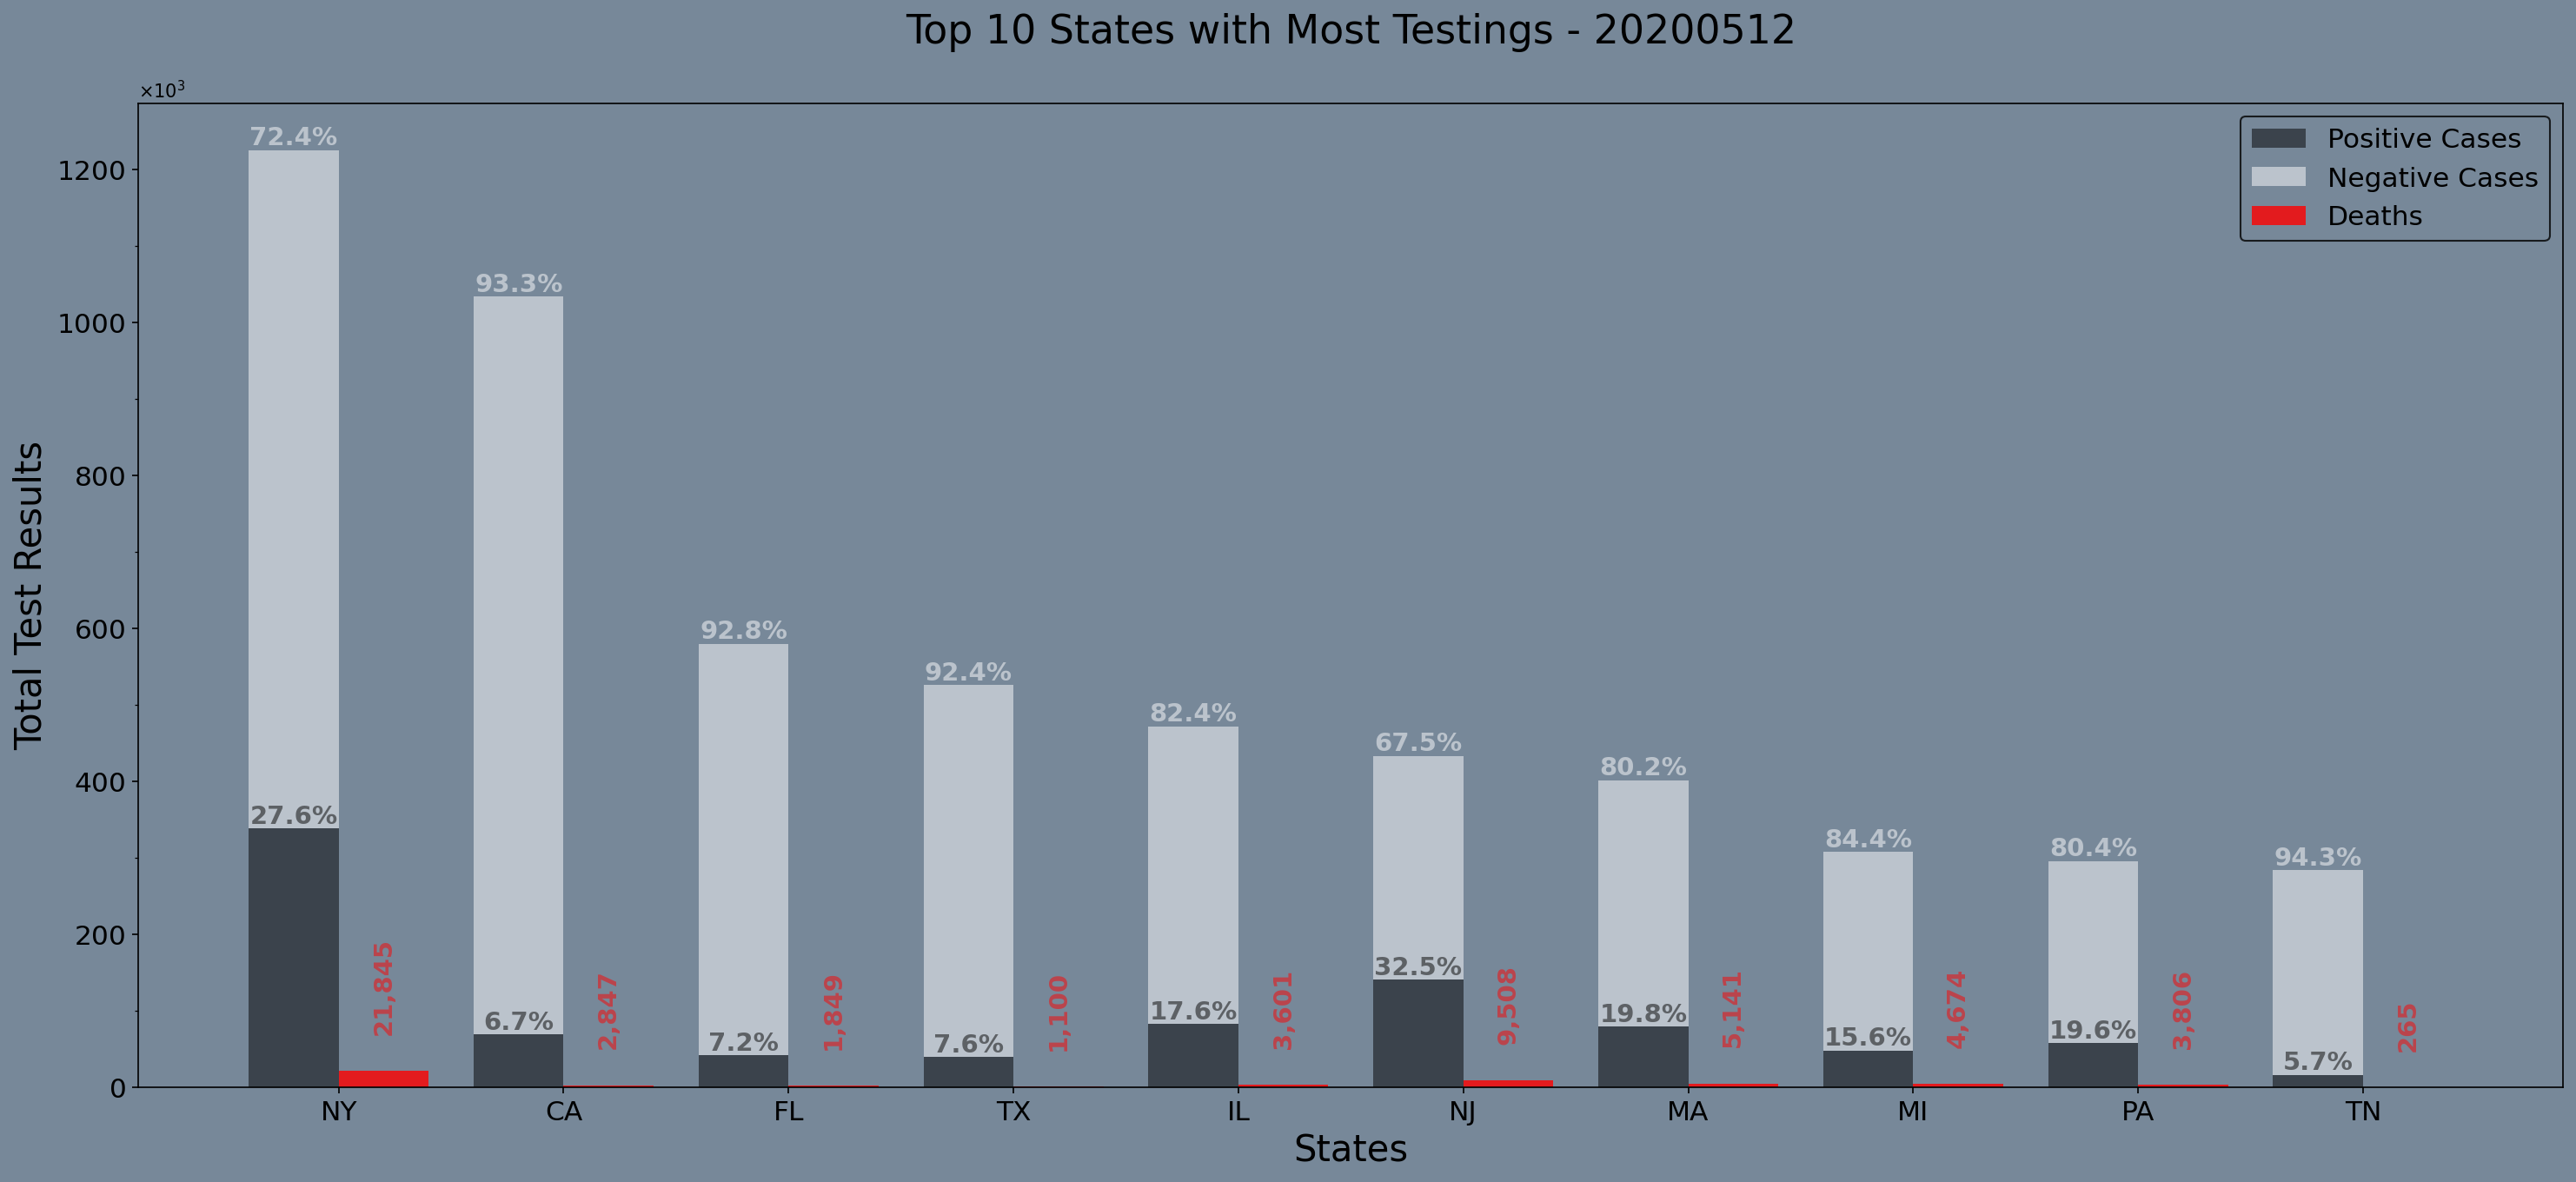

In [2]:
#sort and find top 10 states
df_latest = df_latest.sort_values(by="totalTestResults", ascending=False)[0:10]

#plot variables
x = np.arange(10)
width = 0.4
x_labels = df_latest["state"].tolist()

#initial figure
fig, ax = plt.subplots(figsize=(24, 10), dpi=150,
                       facecolor="lightslategray", edgecolor='k')

# bar graphs for positive, negative, and deaths
pos = ax.bar(x-width/2.,
             df_latest["positive"],
             width,
             color="black",
             alpha=0.5,
             label="Positive Cases"
             )

neg = ax.bar(x-width/2.,
             df_latest["negative"],
             width,
             color="white",
             alpha=0.5,
             bottom=df_latest["positive"],
             label="Negative Cases"
             )
death = ax.bar(x+width/2.,
               df_latest["death"],
               width,
               color="red",
               alpha=0.8,
               label="Deaths"
               )

# adding labels for stacked bar
def addValuesStacked(pos, neg):
    for r1, r2 in zip(pos, neg):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2.,
                 h1,
                 "{:.1%}".format(h1/(h1+h2)),
                 ha="center",
                 va="bottom",
                 color="black",
                 alpha=0.5,
                 fontsize=14,
                 fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2.,
                 h1 + h2,
                 "{:.1%}".format(h2/(h1+h2)),
                 ha="center",
                 va="bottom",
                 color="white",
                 alpha=0.5,
                 fontsize=14,
                 fontweight="bold")


def addValuesBar(bar):
    for rect in bar:
        h3 = rect.get_height()
        ax.annotate('{:,}'.format(int(h3)),
                    xy=(rect.get_x()+rect.get_width()/2., h3),
                    xytext=(0, 20),
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    color='red',
                    rotation=90,
                    alpha=0.5,
                    fontsize=14,
                    fontweight="bold"
                    )


# figure adjustment
ax.set_ylabel('Total Test Results')
ax.set_xlabel('States')
ax.set_title('Top 10 States with Most Testings - {}'.format(lastDate),
             fontsize=22,
             y=1.05)
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
plt.ticklabel_format(style='sci', axis='y', scilimits=(3, 3), useMathText=True)
ax.yaxis.set_minor_locator(MultipleLocator(100000))

# add value labels on bar graphs
addValuesStacked(pos, neg)
addValuesBar(death)

# adjust axes label sizes
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
for item in [ax.xaxis.label, ax.yaxis.label]:
    item.set_fontsize(20)

# colors and yaxis labels
plt.bgcolor = "black"
ax.set_facecolor('lightslategray')
plt.legend(loc="upper right", fontsize=15,
           facecolor="lightslategray", edgecolor="k")


plt.show()

In [3]:
# get population data
URL = "https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/counties/totals/co-est2019-alldata.csv"
fileName = 'pop10-19.csv'

urlretrieve(URL, fileName)








('pop10-19.csv', <http.client.HTTPMessage at 0x1225e0ac8>)

In [81]:
df_pop = pd.read_csv(fileName, encoding='latin-1')

df_popSum = df_pop.loc[df_pop["STNAME"] == df_pop["CTYNAME"],["STNAME","POPESTIMATE2019"]]
df_popSumTop = df_popSum.groupby("STNAME").agg({"POPESTIMATE2019": "sum"})
df_popSumTop = df_popSumTop.sort_values(by="POPESTIMATE2019",ascending = False)[0:10].reset_index()

# popSumTop_list = df_popSumTop.iloc[:, df_popSumTop.columns.get_level_values(0)=='STNAME']
popSumTop_list = df_popSumTop["STNAME"].tolist()

# popSumTop_list = popSumTop_list.reset_index()

# #total US population in 2019
# totalUSPop = df_popSum.sum()

In [82]:
popSumTop_list

['California',
 'Texas',
 'Florida',
 'New York',
 'Pennsylvania',
 'Illinois',
 'Ohio',
 'Georgia',
 'North Carolina',
 'Michigan']

In [85]:
import requests
from bs4 import BeautifulSoup

#Find a table to convert State names to State abbreviation
url = "https://www.50states.com/abbreviations.htm"

r = requests.get(url)
content = r.text

soup = BeautifulSoup(content,'html.parser')

table = soup.find_all('table',class_="spaced stripedRows abbreviations-table table table-hover")
table = table[0]

USAbb_list = list()
USAbb_dict = dict()

for row in table.find_all('tr'):
    for cell in row.find_all('td'):
        USAbb_list.append(cell.text)

for i in range(len(USAbb_list)-1):
    if i % 2 != 0:
        USAbb_dict[USAbb_list[i]] = USAbb_list[i+1]
        
#map this dict to df
df['STATENAME'] = df['state'].map(USAbb_dict)

In [90]:
df_top = df.loc[df["STATENAME"].isin(popSumTop_list)]
df_top

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,total,Total Cases,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,STATENAME
31,20200512,ND,1571.0,46261.0,NaN,38.0,122.0,NaN,NaN,NaN,...,47832,47832,47832,38,2.0,7.0,765.0,53.0,818.0,Ohio
35,20200512,NM,5069.0,101652.0,NaN,207.0,886.0,NaN,NaN,NaN,...,106721,106721,106721,35,8.0,97.0,4017.0,206.0,4223.0,New York
37,20200512,NY,338485.0,886628.0,NaN,7063.0,73143.0,2375.0,NaN,1964.0,...,1225113,1225113,1225113,36,205.0,0.0,19032.0,1430.0,20462.0,North Carolina
40,20200512,OR,3286.0,74320.0,NaN,165.0,673.0,39.0,NaN,25.0,...,77606,77606,77606,41,0.0,0.0,0.0,0.0,0.0,Pennsylvania
46,20200512,TN,16111.0,267713.0,NaN,NaN,1363.0,NaN,NaN,NaN,...,283824,283824,283824,47,14.0,19.0,9980.0,567.0,10547.0,Texas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3752,20200305,NY,22.0,76.0,24.0,NaN,NaN,NaN,NaN,NaN,...,122,98,98,36,0.0,0.0,28.0,16.0,44.0,North Carolina
3742,20200305,FL,9.0,31.0,69.0,NaN,NaN,NaN,NaN,NaN,...,109,40,40,12,0.0,0.0,7.0,7.0,14.0,Georgia
3770,20200304,NY,6.0,48.0,24.0,NaN,NaN,NaN,NaN,NaN,...,78,54,54,36,NaN,NaN,NaN,NaN,NaN,North Carolina
3771,20200304,OR,3.0,29.0,18.0,NaN,NaN,NaN,NaN,NaN,...,50,32,32,41,NaN,NaN,NaN,NaN,NaN,Pennsylvania
